# A Quick Tutorial

In this example, we sample a truncated Gaussian distribution centered at the origin and restricted to a simplex.
The simplex inequality is given as
$$
    Ax = \begin{pmatrix}
         1 &  1 & \cdots &  1 \\
        -1 &  0 & \cdots &  0 \\
         0 & -1 & \cdots &  0 \\
         \vdots & \vdots & \cdots & \vdots \\
         0 &  0 & \cdots & -1
    \end{pmatrix} \begin{pmatrix}
        x_1 \\
        \vdots \\
        x_n
    \end{pmatrix} \leq \begin{pmatrix}
        1 \\
        0 \\
        \vdots \\
        0
    \end{pmatrix} = b,
$$
with $A \in \mathbb{R}^{m \times n}$, $x \in \mathbb{R}^n$ and $b \in \mathbb{R}^m$.
Since the Gaussian distribution is included in ``hopsy`` as a model, 
we do not have to worry further about it for the following example.

Acceptance rates (per chain): 0.2878 0.2892 0.2938 0.2862


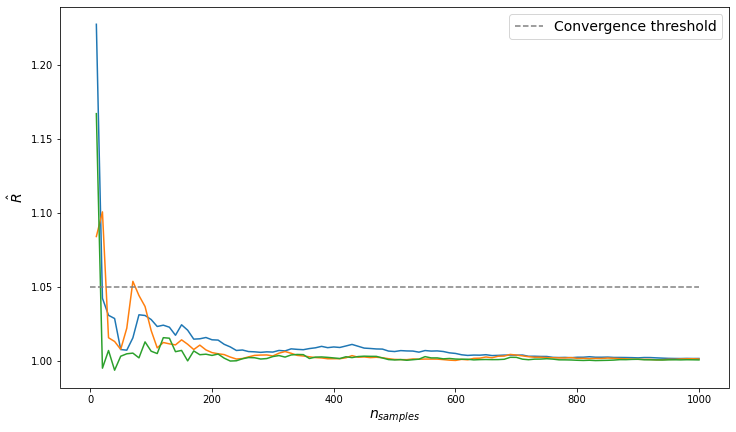

In [1]:
import hopsy
import matplotlib.pyplot as plt

# set up the polytope inequality for a 3-dimensional simplex
A, b = [[1, 1, 1], [-1, 0, 0], [0, -1, 0], [0, 0, -1]], [1, 0, 0, 0]

# create a 3-dimensional gaussian model centered at the origin
model = hopsy.Gaussian(mean=[0, 0, 0])

# set up the problem
problem = hopsy.Problem(A, b, model)

# number of chains we will use
n_chains = 4

# set up a few parallel markov chains using a gaussian proposal and starting in the origin
chains = [hopsy.MarkovChain(problem, proposal=hopsy.GaussianProposal, starting_point=[0, 0, 0]) 
          for i in range(n_chains)]

# proposal distributions usually have some adjustable hyperparameters, 
# the most common being the stepsize (or standard deviation in case 
# of a gaussian proposal)
for chain in chains:
    chain.proposal.stepsize = 0.2

# set up the random number generators
rngs = [hopsy.RandomNumberGenerator(seed=42, stream=i) for i in range(n_chains)]

# and now for the fun!
accrate, states = hopsy.sample(chains, rngs, n_samples=1000, thinning=10)

# when doing mcmc, assessing convergence is very important!
rhat = hopsy.rhat(states, series=10)

print('Acceptance rates (per chain):', *accrate)

fig, ax = plt.subplots(1, 1, figsize=(12,7))

ax.plot(range(10, 1010, 10), rhat)
ax.plot([0, 1000], [1.05, 1.05], linestyle='dashed', color='gray', 
        label='Convergence threshold')

ax.set_xlabel(r"$n_{samples}$", fontsize=14)
ax.set_ylabel(r"$\hat{R}$", fontsize=14)
ax.legend(fontsize=14)

plt.show()

The potential scale reduction factor (or R-hat statistics) indicates good convergence of the chain.